# Logistic Regression Problem 03

### Predicting Customer Churn for a Subscription Service

**Step 1: Generate the Dataset**

In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 400  # Number of customers

# Features
age = np.random.randint(18, 70, n_samples)                     # Age between 18 and 70
monthly_spend = np.random.randint(10, 300, n_samples)          # Monthly spend between $10 and $300
subscription_length = np.random.randint(1, 36, n_samples)      # Subscription length between 1 and 36 months
num_support_tickets = np.random.randint(0, 10, n_samples)      # Number of support tickets (0 to 10)

# Target variable: Churn (1 = Yes, 0 = No)
churn = ((subscription_length < 6) & (monthly_spend < 50) & (num_support_tickets > 5))
churn = churn.astype(int)

# Create the DataFrame
customer_data = pd.DataFrame({
    'Age': age,
    'MonthlySpend': monthly_spend,
    'SubscriptionLength': subscription_length,
    'NumSupportTickets': num_support_tickets,
    'Churn': churn
})

# Display the first few rows of the dataset
print(customer_data.head())


   Age  MonthlySpend  SubscriptionLength  NumSupportTickets  Churn
0   56            63                  22                  4      0
1   69            67                  21                  7      0
2   46           183                   6                  0      0
3   32           289                   1                  9      0
4   60           123                   5                  3      0


**Step 2: Explore the Data**

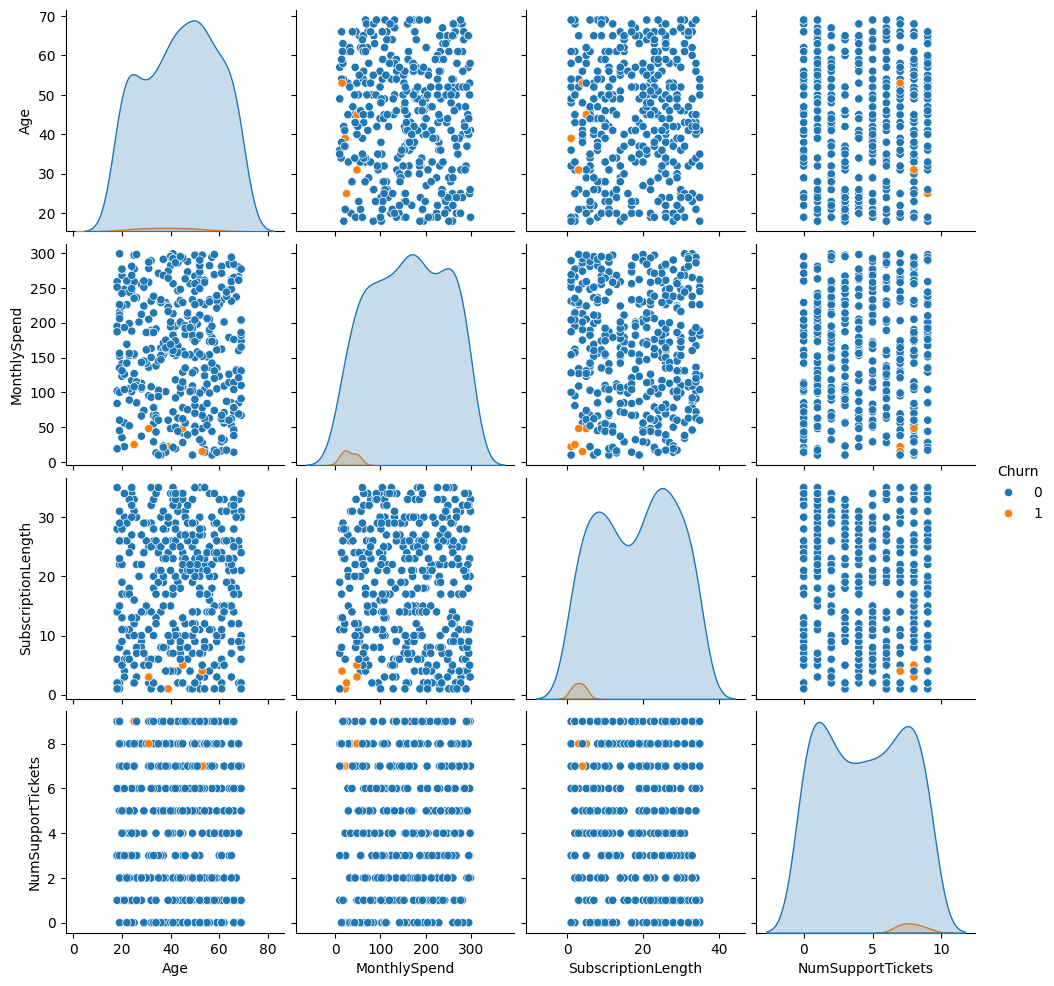

Churn Rate in Dataset: 1.25 %


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships
sns.pairplot(customer_data, hue="Churn")
plt.show()

# Check churn rate
print("Churn Rate in Dataset:", customer_data['Churn'].mean() * 100, "%")


**Step 3: Prepare the Data for Training**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target variable
X = customer_data[['Age', 'MonthlySpend', 'SubscriptionLength', 'NumSupportTickets']]
y = customer_data['Churn']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Step 4: Train the Logistic Regression Model**

In [4]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

**Step 5: Evaluate the Model**

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


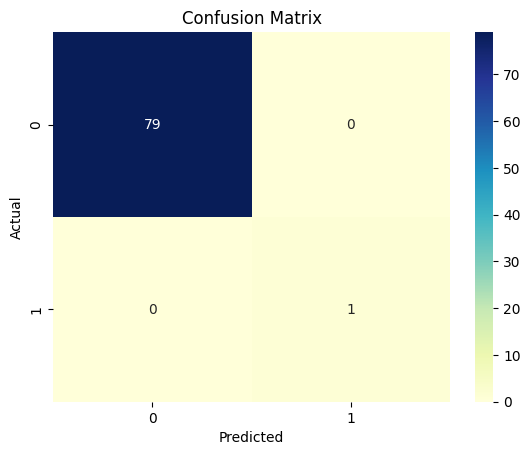

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Step 6: Interpret the Results**

**Accuracy:** Shows the overall correctness of the model. For instance, if the model has an accuracy of 90%, it means it correctly predicted churn or non-churn for 90% of customers.

**Precision and Recall:**

**Precision** indicates how many customers predicted to churn actually did churn. High precision suggests the model is good at identifying true churners.
**Recall** indicates how well the model captured true churners. High recall means fewer true churners were missed.
**Confusion Matrix:** The confusion matrix helps visualize the model’s success and failure rates for each classification (churned vs. not churned).

**RESULTS:**